In [248]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns

from sklearn.metrics import homogeneity_score,completeness_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_rows', 1300)
pd.set_option('display.max_columns', 1300)
pd.set_option('display.width', 1300)

In [249]:
# prepare data

# loop thr
trainData = pd.read_csv('CS98XRegressionTrain.csv')
trainData = pd.DataFrame(trainData)


testData = pd.read_csv('CS98XRegressionTest.csv')
testData = pd.DataFrame(testData)

#print(wholeList)

In [250]:
# check shape of the data
print('train data shape:',trainData.shape)
print('test data shape:',testData.shape)


train data shape: (453, 15)
test data shape: (114, 14)


In [251]:
# check the info of the data
print('train data info:',trainData.info())
print('test data info:',testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------   

In [252]:
# check if duplicate row exist in test data and train data

print('train data duplicated:',trainData.duplicated().any())
print('test data duplicated:',testData.duplicated().any())

train data duplicated: False
test data duplicated: False


In [253]:
# check if any NaN cell
print('train data NaN:',trainData.columns[trainData.isnull().any()])
print('test data NaN:',testData.columns[testData.isnull().any()].isnull())


train data NaN: Index(['top genre'], dtype='object')
test data NaN: [False]


In [254]:
# filter out the NaN rows 
# 1) run drop if empty found
# 2) create a new dataframe that for future use
if not(trainData.columns[trainData.isnull().any()].isnull()):
    trainDataClean = trainData.drop(trainData[trainData['top genre'].isnull()].index)
testDataClean = testData.copy()
print (trainDataClean.describe())


               Id         year         bpm        nrgy        dnce          dB        live         val         dur       acous        spch         pop
count  438.000000   438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000
mean   227.600457  1990.881279  118.326484   60.504566   59.780822   -8.787671   17.605023   59.625571  228.267123   32.191781    5.671233   61.557078
std    130.463047    16.697047   25.175735   22.089660   15.404757    3.591005   13.807492   24.480160   63.426812   29.279912    5.571392   12.759353
min      1.000000  1948.000000   62.000000    7.000000   18.000000  -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   26.000000
25%    116.250000  1976.000000  100.000000   44.000000   50.000000  -11.000000    9.000000   42.250000  184.500000    7.000000    3.000000   54.000000
50%    226.500000  1993.000000  120.000000   64.000000   62.000000   -8.000000   13.000000   6

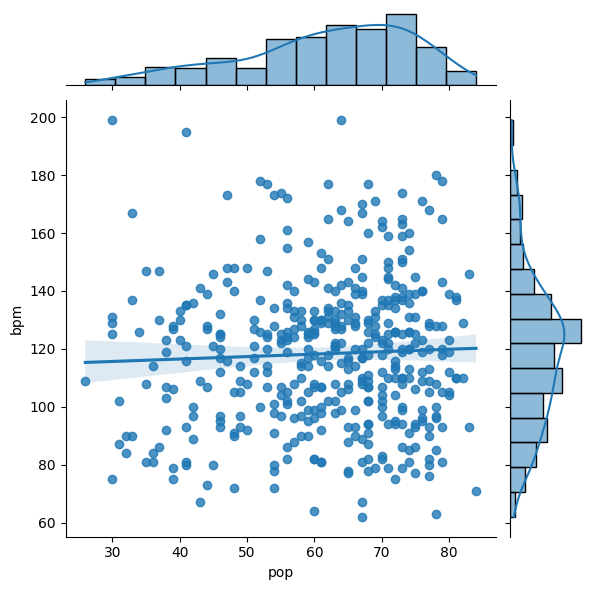

In [255]:
# Exploratory Data Analysis(EDA)
# 1)pop vs bpm
sns.jointplot(x='pop',y='bpm',data=trainDataClean,kind="reg")

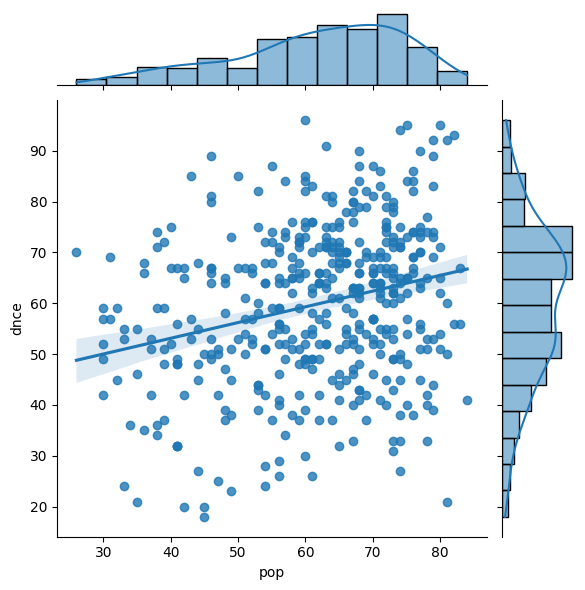

In [256]:
# 2)dnce vs pop
sns.jointplot(x='pop',y='dnce',data=trainDataClean,kind="reg")

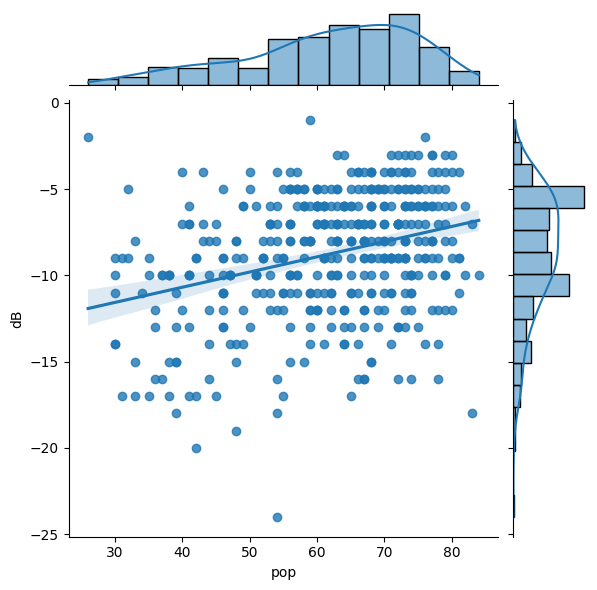

In [257]:
# 3)dB vs pop
sns.jointplot(x='pop',y='dB',data=trainDataClean,kind="reg")

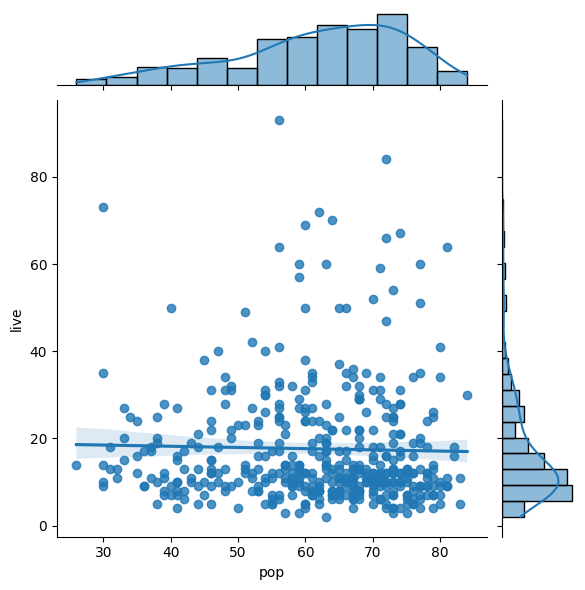

In [258]:
# 4)live vs pop
sns.jointplot(x='pop',y='live',data=trainDataClean,kind="reg")

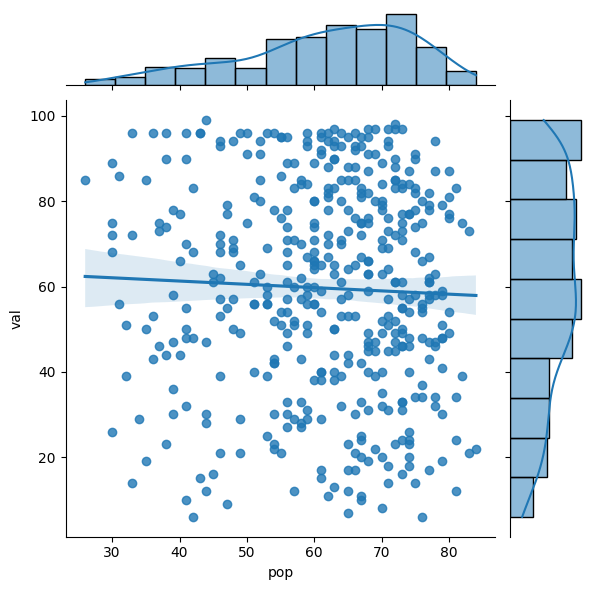

In [259]:
# 5)val vs pop
sns.jointplot(x='pop',y='val',data=trainDataClean,kind="reg")

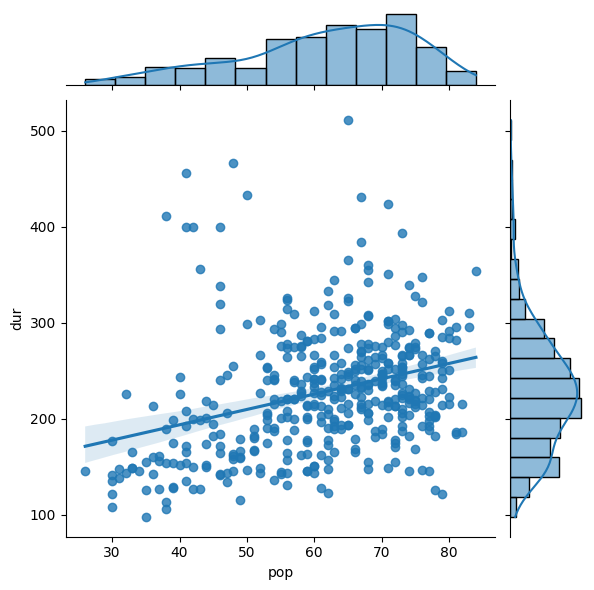

In [260]:
# 6)dur vs pop
sns.jointplot(x='pop',y='dur',data=trainDataClean,kind="reg")

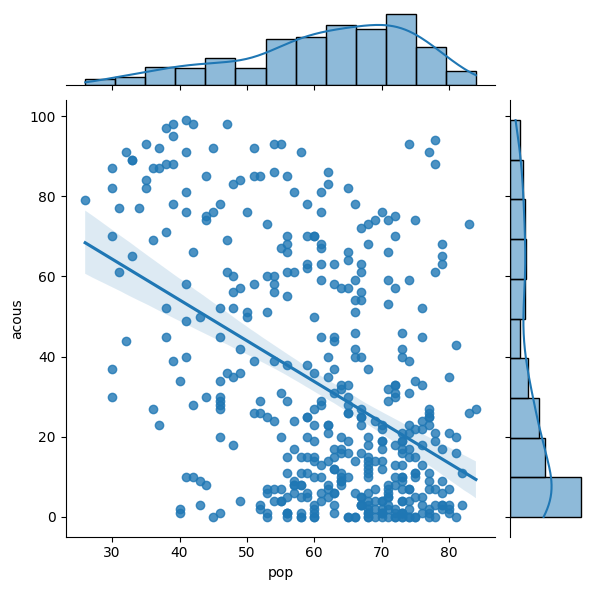

In [261]:
# 7)acous vs pop
sns.jointplot(x='pop',y='acous',data=trainDataClean,kind="reg")

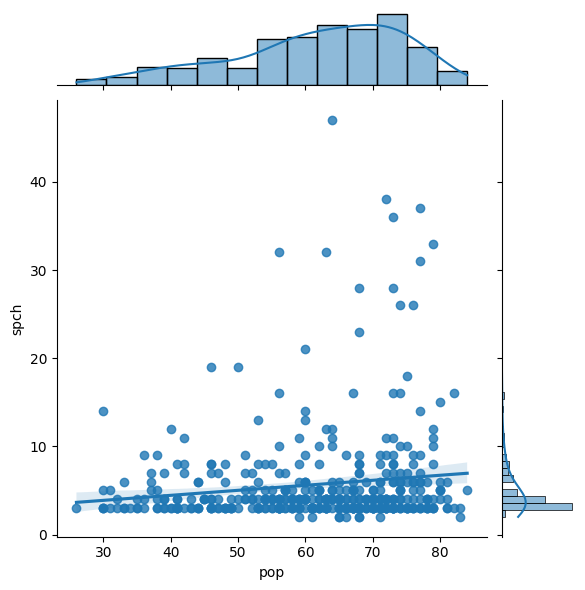

In [262]:
# 8)spch vs pop
sns.jointplot(x='pop',y='spch',data=trainDataClean,kind="reg")

In [263]:
# seperated list - train data

y = trainDataClean["pop"]
x = trainDataClean.drop(columns=["top genre","Id","artist","title","year","pop"])

stdScaler = StandardScaler()
xScaled = stdScaler.fit_transform(x)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeat.fit_transform(x)
xPolyScaled = stdScaler.fit_transform(xPoly)



In [ ]:
# seperate list - test data
xTest = testDataClean.drop(columns=["top genre","Id","artist","title","year"])

stdScaler = StandardScaler()
xScaledTest = stdScaler.fit_transform(xTest)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPolyScaledTest = polyFeat.fit_transform(xTest)
xPolyScaledTest = stdScaler.fit_transform(xPolyScaledTest)

In [264]:
# Decision Tree Regression
# scaled x is not applied for this sample as decision tree do not require scaling
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=5) # explore min_samples = e.g. put to 1 to see what happens
tree.fit(x,y)
predTreeTrain = tree.predict(x) # Check fit
linearMse = mean_squared_error(y, predTreeTrain)
linearMse = np.sqrt(linearMse)
linearMse

6.867438978769967

In [265]:
# Check on test set

xTest = testDataClean.drop(columns=["top genre","Id","artist","title","year"])
predTreeTest = tree.predict(xTest) # Check fitpredTreeTrain
print(predTreeTest)
np.savetxt("my_data_tree.csv", predTreeTest, delimiter=",", 
           header="pop", comments="")

[73.75       71.16666667 53.66666667 51.375      68.         72.4
 53.66666667 45.2        71.16666667 62.25       70.66666667 61.28571429
 70.66666667 75.         73.75       55.16666667 63.         68.4
 65.71428571 65.83333333 39.2        69.25       68.         45.2
 58.16666667 68.6        60.5        47.         36.33333333 76.66666667
 73.4        52.4        70.875      71.16666667 68.6        73.75
 60.66666667 53.66666667 68.4        63.6        75.2        75.2
 61.28571429 36.33333333 75.         66.         62.25       47.
 68.8        64.28571429 46.2        75.2        58.16666667 35.125
 61.57142857 69.25       72.4        45.4        68.42857143 38.8
 55.16666667 71.16666667 76.66666667 71.42857143 68.42857143 68.4
 78.4        53.66666667 60.66666667 47.         76.66666667 61.57142857
 47.875      63.6        61.57142857 71.42857143 76.66666667 71.28571429
 78.4        47.875      76.66666667 70.83333333 40.83333333 73.16666667
 68.         47.         76.66666667 60

In [270]:
from sklearn.svm import SVR
svrPoly = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svrPoly.fit(xPolyScaled,y)
predSVRPolyTrain = svrPoly.predict(xPolyScaled) # Check fit
linearMse = mean_squared_error(y, predSVRPolyTrain)
linearMse = np.sqrt(linearMse)
linearMse

7.640064371686172

In [272]:
# Check on test set

predSVRPolyTest = svrPoly.predict(xPolyScaled) # Check fitpredTreeTrain
print(predSVRPolyTest)
np.savetxt("my_data_SVR.csv", predSVRPolyTest, delimiter=",", 
           header="pop", comments="")

NameError: name 'xPolyScaled' is not defined